In [1]:
import pandas as pd
import numpy as np
import regex as rg
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from collections import Counter

In C:\Users\jessi\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The text.latex.preview rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jessi\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jessi\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
In C:\Users\jessi\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
In C:\Users\jessi\Anaconda\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test.mplstyle

In [2]:
df_einstein_exames = pd.read_csv('Einstein_v4.csv', sep = '|', encoding = 'utf-8-sig')
df_fleury_exames = pd.read_csv('Fleury_v4.csv', sep = '|', encoding = 'utf-8-sig')
df_hsl_exames = pd.read_csv('HSL_v4.csv', sep = '|', encoding = 'utf-8-sig')

In [3]:
path_einstein = 'C:\\Users\\jessi\\Documents\\TCC Docs\\Datasets Covid\\EINSTEINAgosto\\'
path_fleury = 'C:\\Users\\jessi\\Documents\\TCC Docs\\Datasets Covid\\GrupoFleuryAgosto\\'
path_hsl = 'C:\\Users\\jessi\\Documents\\TCC Docs\\Datasets Covid\\HSL_Agosto\\final\\'

In [4]:
df_einstein_pacientes = pd.read_csv(path_einstein + 'EINSTEIN_Pacientes_2.csv', sep = '|', encoding = 'utf-8-sig')
df_fleury_pacientes = pd.read_csv(path_fleury + 'GrupoFleury_Pacientes_2.csv', sep = '|', encoding = 'utf-8-sig')
df_hsl_pacientes = pd.read_csv(path_hsl + 'HSL_Pacientes_2.csv', sep = '|', encoding = 'utf-8-sig')

In [5]:
df_einstein_pacientes.drop(['CD_UF', 'CD_MUNICIPIO', 'CD_CEPREDUZIDO', 'CD_PAIS'], axis=1, inplace=True)
df_fleury_pacientes.drop(['CD_UF', 'CD_MUNICIPIO', 'CD_CEPREDUZIDO', 'CD_PAIS'], axis=1, inplace=True)
df_hsl_pacientes.drop(['CD_UF', 'CD_MUNICIPIO', 'CD_CEPREDUZIDO', 'CD_PAIS'], axis=1, inplace=True)

In [6]:
df_einstein_pacientes['AA_NASCIMENTO'].fillna(value=df_einstein_pacientes['AA_NASCIMENTO'].mode(), inplace=True)
df_fleury_pacientes['AA_NASCIMENTO'].fillna(value=df_fleury_pacientes['AA_NASCIMENTO'].mode(), inplace=True)
df_hsl_pacientes['AA_NASCIMENTO'].fillna(value=df_hsl_pacientes['AA_NASCIMENTO'].mode(), inplace=True)

In [7]:
df_einstein = pd.merge(df_einstein_pacientes, df_einstein_exames, on='ID_PACIENTE')
df_fleury = pd.merge(df_fleury_pacientes, df_fleury_exames, on='ID_PACIENTE')
df_hsl = pd.merge(df_hsl_pacientes, df_hsl_exames, on='ID_PACIENTE')

In [8]:
df_einstein['DT_COLETA'] = pd.to_datetime(df_einstein['DT_COLETA'], infer_datetime_format=True)
df_fleury['DT_COLETA'] = pd.to_datetime(df_fleury['DT_COLETA'], infer_datetime_format=True)
df_hsl['DT_COLETA'] = pd.to_datetime(df_hsl['DT_COLETA'], infer_datetime_format=True)

In [9]:
df_einstein.loc[df_einstein['AA_NASCIMENTO'] == 'AAAA', 'AA_NASCIMENTO'] = 0
df_einstein.fillna({'AA_NASCIMENTO': df_einstein['AA_NASCIMENTO'].mode()}, inplace=True)
df_fleury.loc[df_fleury['AA_NASCIMENTO'] == 'AAAA', 'AA_NASCIMENTO'] = 0
df_fleury.fillna({'AA_NASCIMENTO': df_fleury['AA_NASCIMENTO'].mode()}, inplace=True)
df_hsl.loc[df_hsl['AA_NASCIMENTO'] == 'AAAA', 'AA_NASCIMENTO'] = 0
df_hsl.fillna({'AA_NASCIMENTO': df_hsl['AA_NASCIMENTO'].mode()}, inplace=True)

In [10]:
df_einstein['AA_NASCIMENTO'] = df_einstein['AA_NASCIMENTO'].astype(int)
df_fleury['AA_NASCIMENTO'] = df_fleury['AA_NASCIMENTO'].astype(int)
df_hsl['AA_NASCIMENTO'] = df_hsl['AA_NASCIMENTO'].astype(int)

In [11]:
df_einstein['IDADE_PAC'] = df_einstein['DT_COLETA'].dt.year - df_einstein['AA_NASCIMENTO']
df_fleury['IDADE_PAC'] = df_fleury['DT_COLETA'].dt.year - df_fleury['AA_NASCIMENTO']
df_hsl['IDADE_PAC'] = df_hsl['DT_COLETA'].dt.year - df_hsl['AA_NASCIMENTO']

In [12]:
df_einstein.loc[df_einstein['IC_SEXO'] == 'F', 'IC_SEXO'] = 1
df_einstein.loc[df_einstein['IC_SEXO'] == 'M', 'IC_SEXO'] = 2
df_fleury.loc[df_fleury['IC_SEXO'] == 'F', 'IC_SEXO'] = 1
df_fleury.loc[df_fleury['IC_SEXO'] == 'M', 'IC_SEXO'] = 2
df_hsl.loc[df_hsl['IC_SEXO'] == 'F', 'IC_SEXO'] = 1
df_hsl.loc[df_hsl['IC_SEXO'] == 'M', 'IC_SEXO'] = 2

In [13]:
del df_einstein['AA_NASCIMENTO']
del df_fleury['AA_NASCIMENTO']
del df_hsl['AA_NASCIMENTO']

In [14]:
df_einstein = df_einstein.set_index(['ID_PACIENTE', 'DT_COLETA'])
df_fleury = df_fleury.set_index(['ID_PACIENTE', 'DT_COLETA'])
df_hsl = df_hsl.set_index(['ID_PACIENTE', 'DT_COLETA'])

In [15]:
df_einstein['HOSP'] = 1 #'EINSTEIN'
df_fleury['HOSP'] = 2 #'FLEURY'
df_hsl['HOSP'] = 3 #'HSL'

In [16]:
df_einstein.loc[df_einstein['METODO_DIAGNOSTICO_COVID'] == 'PCR', 'METODO_DIAGNOSTICO_COVID'] = 1
df_einstein.loc[df_einstein['METODO_DIAGNOSTICO_COVID'] == 'Sorologia IgM', 'METODO_DIAGNOSTICO_COVID'] = 2
df_fleury.loc[df_fleury['METODO_DIAGNOSTICO_COVID'] == 'PCR', 'METODO_DIAGNOSTICO_COVID'] = 1
df_fleury.loc[df_fleury['METODO_DIAGNOSTICO_COVID'] == 'Sorologia IgM', 'METODO_DIAGNOSTICO_COVID'] = 2
df_hsl.loc[df_hsl['METODO_DIAGNOSTICO_COVID'] == 'PCR', 'METODO_DIAGNOSTICO_COVID'] = 1
df_hsl.loc[df_hsl['METODO_DIAGNOSTICO_COVID'] == 'Sorologia IgM', 'METODO_DIAGNOSTICO_COVID'] = 2

In [17]:
df_einstein = df_einstein[['HOSP', 'IC_SEXO', 'IDADE_PAC', 'Hemograma Contagem Auto - Basófilos', 
                           'Hemograma Contagem Auto - Eosinófilos', 'Hemograma Contagem Auto - Linfócitos',
                           'Hemograma Contagem Auto - Monócitos', 'Hemograma Contagem Auto - Neutrófilos',
                           'Hemograma com Plaquetas - CHCM', 'Hemograma com Plaquetas - HCM',
                           'Hemograma com Plaquetas - Hematócrito', 'Hemograma com Plaquetas - Hemoglobina',
                           'Hemograma com Plaquetas - RDW', 'Hemograma com Plaquetas - Volume Médio Plaquetário',
                           'Urina Tipo I - Aspecto', 'Urina Tipo I - Açúcar', 'Urina Tipo I - Cor',
                           'Urina Tipo I - Corpos cetônicos', 'Urina Tipo I - Densidade', 
                           'Urina Tipo I - Nitrito', 'Urina Tipo I - Proteína', 'Urina Tipo I - Urobilinogênio', 
                           'Urina Tipo I - pH', 'METODO_DIAGNOSTICO_COVID', 'DIAGNOSTICO_COVID']]

In [18]:
df_fleury = df_fleury[['HOSP', 'IC_SEXO', 'IDADE_PAC', 'HEMOGRAMA, sangue total - Basófilos (%)',
                       'HEMOGRAMA, sangue total - Eosinófilos (%)', 'HEMOGRAMA, sangue total - Linfócitos (%)',
                       'HEMOGRAMA, sangue total - Monócitos (%)', 'HEMOGRAMA, sangue total - Neutrófilos (%)',
                       'HEMOGRAMA, sangue total - Concentração de Hemoglobina Corpuscular', 
                       'HEMOGRAMA, sangue total - Hemoglobina Corpuscular Média', 'HEMOGRAMA, sangue total - Hematócrito',
                       'HEMOGRAMA, sangue total - Hemoglobina', 'HEMOGRAMA, sangue total - RDW',
                       'HEMOGRAMA, sangue total - Volume plaquetário médio', 'URINA TIPO I - JATO MEDIO - Aspecto, urina',
                       'URINA TIPO I - JATO MEDIO - Glicose, urina isolada', 'URINA TIPO I - JATO MEDIO - Cor, urina',
                       'URINA TIPO I - JATO MEDIO - Corpos cetônicos, urina', 'URINA TIPO I - JATO MEDIO - Densidade, urina',
                       'URINA TIPO I - JATO MEDIO - Nitrito, urina', 'URINA TIPO I - JATO MEDIO - Proteínas, urina isolada', 
                       'URINA TIPO I - JATO MEDIO - Urobilinogênio, urina', 'URINA TIPO I - JATO MEDIO - pH, urina', 
                       'METODO_DIAGNOSTICO_COVID', 'DIAGNOSTICO_COVID']]

In [19]:
df_hsl = df_hsl[['HOSP', 'IC_SEXO', 'IDADE_PAC', 'Hemograma - Basófilos (%)', 'Hemograma - Eosinófilos (%)',
                 'Hemograma - Linfócitos (%)', 'Hemograma - Monócitos (%)', 'Hemograma - Neutrófilos (%)', 
                 'Hemograma - CHCM', 'Hemograma - HCM', 'Hemograma - Hematócrito', 'Hemograma - Hemoglobina', 
                 'Hemograma - RDW', 'Hemograma - Volume plaquetário médio', 'Urina Tipo I - Jato Medio - Aspecto, urina',
                 'Urina Tipo I - Jato Medio - Glicose, urina isol', 'Urina Tipo I - Jato Medio - Cor, urina',
                 'Urina Tipo I - Jato Medio - C.Cetônicos, urina', 'Urina Tipo I - Jato Medio - Densidade, urina',
                 'Urina Tipo I - Jato Medio - Nitrito, urina', 'Urina Tipo I - Jato Medio - Proteínas, urina isolada',
                 'Urina Tipo I - Jato Medio - Urobilinogênio,urina', 'Urina Tipo I - Jato Medio - pH, urina', 
                 'METODO_DIAGNOSTICO_COVID', 'DIAGNOSTICO_COVID']]

In [20]:
columns_geral = ['HOSP', 'SEXO', 'IDADE', 'Hemograma - Basófilos', 'Hemograma - Eosinófilos', 'Hemograma - Linfócitos', 
                 'Hemograma - Monócitos', 'Hemograma - Neutrófilos','Hemograma - CHCM', 'Hemograma - HCM', 
                 'Hemograma - Hematócrito', 'Hemograma - Hemoglobina', 'Hemograma - RDW', 'Hemograma - Volume plaquetário médio',
                 'Urina - Aspecto', 'Urina - Glicose', 'Urina - Cor', 'Urina - Corpos Cetônicos',  'Urina - Densidade', 
                 'Urina - Nitrito', 'Urina - Proteínas', 'Urina - Urobilinogênio', 'Urina - pH','METODO_DIAGNOSTICO_COVID', 
                 'DIAGNOSTICO_COVID']

In [21]:
dict_einstein = dict(zip(df_einstein.columns, columns_geral))
dict_fleury = dict(zip(df_fleury.columns, columns_geral))
dict_hsl = dict(zip(df_hsl.columns, columns_geral))

In [22]:
df_einstein.rename(columns=dict_einstein, inplace=True)
df_fleury.rename(columns=dict_fleury, inplace=True)
df_hsl.rename(columns=dict_hsl, inplace=True)

In [23]:
df_geral = pd.concat([df_einstein, df_fleury, df_hsl])
df_geral.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6278 entries, ('af8e03c6d1f5c266e77ae0021baaded2056e3e26', Timestamp('2020-08-01 00:00:00')) to ('E6916272621AC6D6126E7594D0C27ADE', Timestamp('2020-07-05 00:00:00'))
Data columns (total 25 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   HOSP                                  6278 non-null   int64  
 1   SEXO                                  6278 non-null   object 
 2   IDADE                                 6278 non-null   int64  
 3   Hemograma - Basófilos                 6278 non-null   float64
 4   Hemograma - Eosinófilos               6278 non-null   float64
 5   Hemograma - Linfócitos                6278 non-null   float64
 6   Hemograma - Monócitos                 6278 non-null   float64
 7   Hemograma - Neutrófilos               6278 non-null   float64
 8   Hemograma - CHCM                      6278 non-null   float64
 9   Hemogram

In [31]:
df_geral.fillna({'Hemograma - Volume plaquetário médio': df_geral['Hemograma - Volume plaquetário médio'].mean()}, inplace=True)
df_geral['METODO_DIAGNOSTICO_COVID'] = df_geral['METODO_DIAGNOSTICO_COVID'].astype(int)
df_geral.to_csv('Dataset geral.csv', sep="|",encoding='utf-8-sig')

In [32]:
df_geral.to_excel('Dataset geral Excel.xlsx', engine='xlsxwriter', encoding='utf-8-sig')

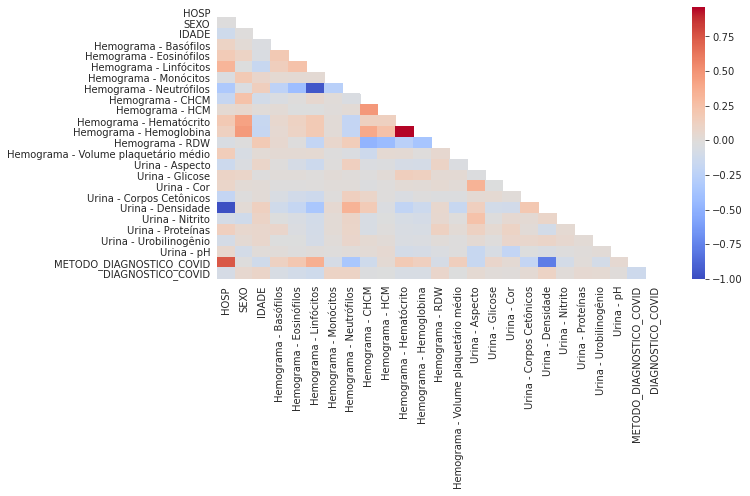

In [44]:
mask = np.zeros_like(df_geral.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 5))
    ax = sns.heatmap(df_geral.corr(), mask=mask, vmin=-1, cmap='coolwarm')
    fig = ax.get_figure()
    fig.savefig('Mapa de Calor de Correlações - Dataset Desbalanceado', dpi=300, bbox_inches='tight')
plt.show()

In [40]:
cols_to_model = df_geral.columns.to_list()
X = df_geral[cols_to_model[:-1]]
y = df_geral['DIAGNOSTICO_COVID']

In [41]:
rus = RandomUnderSampler() 
X_rus, y_rus = rus.fit_resample(X, y) # resampling X, y
Undersample_Dataset = X_rus.merge(y_rus, on=X_rus.index).iloc[:,1:]
Undersample_Dataset.to_csv('Dataset Random Undersampling.csv', sep="|", encoding='utf-8-sig')
Undersample_Dataset.to_excel('Dataset Random Undersampling.xlsx', engine='xlsxwriter', encoding='utf-8-sig')
print(Counter(y_rus)) # new class distribution

Counter({0: 631, 1: 631})


In [42]:
# transform the dataset
oversample = SMOTE()
X_over, y_over = oversample.fit_resample(X, y)
oversample_Dataset = X_over.merge(y_over, on=X_over.index).iloc[:,1:]
oversample_Dataset.to_csv('Dataset SMOTE Oversampling.csv', sep="|", encoding='utf-8-sig')
oversample_Dataset.to_excel('Dataset SMOTE Oversampling.xlsx', engine='xlsxwriter', encoding='utf-8-sig')
print(Counter(y_over)) # new class distribution

Counter({0: 5647, 1: 5647})


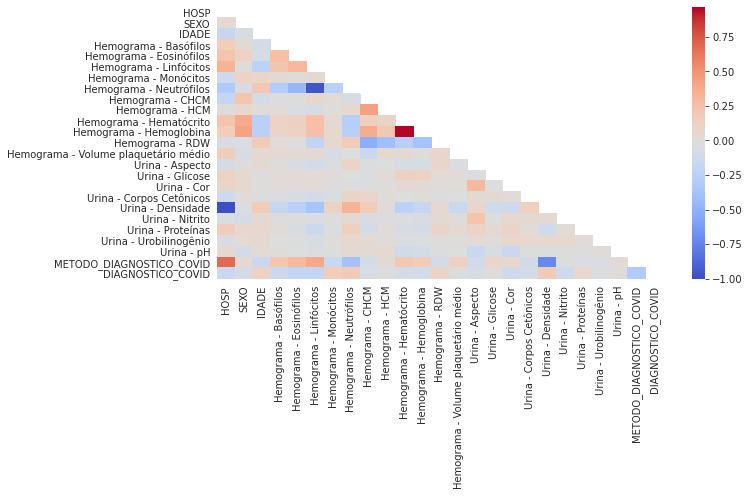

In [45]:
mask = np.zeros_like(oversample_Dataset.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 5))
    ax = sns.heatmap(oversample_Dataset.corr(), mask=mask, vmin=-1, cmap='coolwarm')
    fig = ax.get_figure()
    fig.savefig('Mapa de Calor de Correlações - Dataset SMOTE Oversampling', dpi=300, bbox_inches='tight')
plt.show()

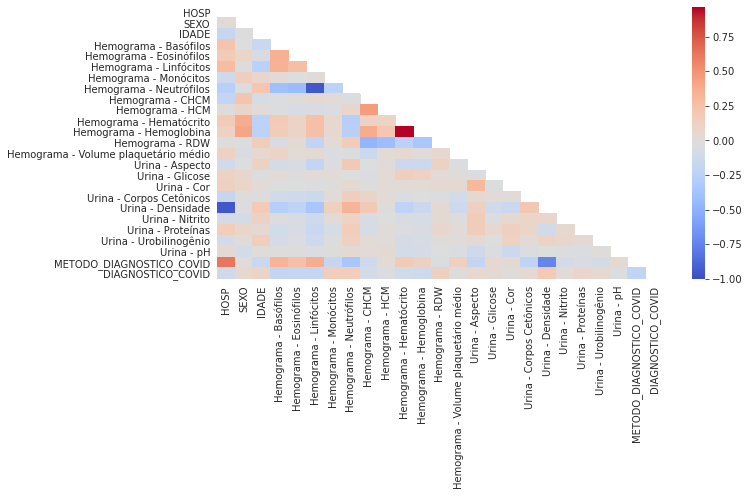

In [46]:
mask = np.zeros_like(Undersample_Dataset.corr())
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(10, 5))
    ax = sns.heatmap(Undersample_Dataset.corr(), mask=mask, vmin=-1, cmap='coolwarm')
    fig = ax.get_figure()
    fig.savefig('Mapa de Calor de Correlações - Dataset Random Undersampling', dpi=300, bbox_inches='tight')
plt.show()